Command history:

    %run parse_log.py logs/6players/mixed outlogs/6players/mixed parsed.hdf
    %run parse_log.py logs/6players/better outlogs/6players/better parsed.hdf
    %run parse_log.py logs/6players/chron outlogs/6players/chron parsed.hdf
    %run parse_log.py logs/6players/stupid outlogs/6players/stupid parsed.hdf
    
    %run parse_log.py logs/5players/mixed outlogs/5players/mixed parsed.hdf
    %run parse_log.py logs/5players/better outlogs/5players/better parsed.hdf
    %run parse_log.py logs/5players/chron outlogs/5players/chron parsed.hdf
    %run parse_log.py logs/5players/stupid outlogs/5players/stupid parsed.hdf
    
    %run parse_log.py logs/4players/mixed outlogs/4players/mixed parsed.hdf
    %run parse_log.py logs/4players/better outlogs/4players/better parsed.hdf
    %run parse_log.py logs/4players/chron outlogs/4players/chron parsed.hdf
    %run parse_log.py logs/4players/stupid outlogs/4players/stupid parsed.hdf
    
    %run parse_log.py logs/3players/mixed outlogs/3players/mixed parsed.hdf
    %run parse_log.py logs/3players/better outlogs/3players/better parsed.hdf
    %run parse_log.py logs/3players/chron outlogs/3players/chron parsed.hdf
    %run parse_log.py logs/3players/stupid outlogs/3players/stupid parsed.hdf
    %run parse_log.py logs/3players/chronvbetter outlogs/3players/chronvbetter parsed.hdf

In [8]:
%run parse_log.py logs/ outlogs/test parsed

logs\mylog0.game4.log list index out of range
logs\mylog1.game15.log list index out of range
logs\mylog2.game9.log list index out of range
logs\mylog3.game20.log list index out of range


In [7]:
df = pd.read_hdf("outlogs/few/parsed0.hdf")
df.sample(10)

,Player 0 Alaska,Player 0 Northwest Territories,Player 0 Greenland,Player 0 Alberta,Player 0 Ontario,Player 0 Quebec,Player 0 Western United States,Player 0 Eastern United States,Player 0 Mexico,Player 0 Venezuala,...,Player 2 player_average_boundary_fortifications,Player 0 player_connected_components,Player 1 player_connected_components,Player 2 player_connected_components,winner,Player 1 soft score,Second,Player 0 soft score,Third,Player 2 soft score
106,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5.500000,1.0,4.0,3.0,1,1,0,0.5,2,0.333333
95,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,3.833333,6.0,5.0,5.0,1,1,0,0.5,2,0.333333
40,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.000000,4.0,6.0,4.0,1,1,0,0.5,2,0.333333
70,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,2.300000,4.0,6.0,6.0,1,1,0,0.5,2,0.333333
48,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.333333,4.0,6.0,5.0,1,1,0,0.5,2,0.333333
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-1.000000,1.0,2.0,0.0,1,1,0,0.5,2,0.333333
121,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.800000,3.0,5.0,4.0,1,1,0,0.5,2,0.333333
72,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,2.400000,4.0,6.0,6.0,1,1,0,0.5,2,0.333333
24,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.000000,2.0,5.0,4.0,1,1,0,0.5,2,0.333333
10,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.000000,1.0,5.0,1.0,1,1,0,0.5,2,0.333333


In [2]:
from sklearn.model_selection import ShuffleSplit
from sklearn.metrics import confusion_matrix

from scipy.special import softmax

import itertools
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense
from keras.regularizers import l1_l2
import keras

Using TensorFlow backend.
C:\Users\lodeo\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\lodeo\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\lodeo\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\lodeo\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py

In [5]:
 #https://dfrieds.com/machine-learning/visual-introduction-classification-logistic-regression-python.html
def plot_cm(cm, num_players, title, cmap=plt.cm.Blues):
    classes = ["Player {}".format(i) for i in range(1,num_players+1)]
    
    plt.figure(figsize=(8,6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    tick_marks = np.arange(num_players)
    plt.xticks(tick_marks, classes, rotation=0)
    plt.yticks(tick_marks, classes)
    thresh = cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], 'd'), horizontalalignment="center", 
                 fontsize=23, color="white" if cm[i, j] > thresh else "black")
    plt.ylabel('True winner', labelpad=12)
    plt.xlabel('Predicted winner', labelpad=12)
    plt.tight_layout()
    plt.show()

200th turn dataset:
Train on 25863 samples, validate on 6466 samples
Epoch 1/30
25863/25863 [==============================] - 2s 71us/step - loss: 8.8022 - accuracy: 0.0966 - val_loss: 6.7935 - val_accuracy: 0.1110
Epoch 2/30
25863/25863 [==============================] - 2s 59us/step - loss: 5.6398 - accuracy: 0.1359 - val_loss: 4.6159 - val_accuracy: 0.1663
Epoch 3/30
25863/25863 [==============================] - 2s 75us/step - loss: 3.9056 - accuracy: 0.2230 - val_loss: 3.2591 - val_accuracy: 0.2809
Epoch 4/30
25863/25863 [==============================] - 2s 71us/step - loss: 2.8978 - accuracy: 0.3444 - val_loss: 2.5548 - val_accuracy: 0.4012
Epoch 5/30
25863/25863 [==============================] - 2s 69us/step - loss: 2.3743 - accuracy: 0.4280 - val_loss: 2.1649 - val_accuracy: 0.4633
Epoch 6/30
25863/25863 [==============================] - 2s 81us/step - loss: 2.0607 - accuracy: 0.4709 - val_loss: 1.9146 - val_accuracy: 0.4957
Epoch 7/30
25863/25863 [=========================

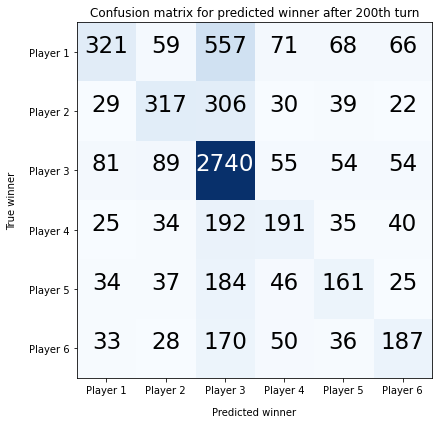

300th turn dataset:
Train on 13845 samples, validate on 3462 samples
Epoch 1/30
13845/13845 [==============================] - 1s 89us/step - loss: 12.9804 - accuracy: 0.1369 - val_loss: 10.8774 - val_accuracy: 0.1372
Epoch 2/30
13845/13845 [==============================] - 1s 63us/step - loss: 9.5975 - accuracy: 0.1472 - val_loss: 8.2307 - val_accuracy: 0.1756
Epoch 3/30
13845/13845 [==============================] - 1s 69us/step - loss: 7.5067 - accuracy: 0.1925 - val_loss: 6.5892 - val_accuracy: 0.2484
Epoch 4/30
13845/13845 [==============================] - 1s 68us/step - loss: 6.1044 - accuracy: 0.2672 - val_loss: 5.4272 - val_accuracy: 0.3151
Epoch 5/30
13845/13845 [==============================] - 1s 72us/step - loss: 5.0752 - accuracy: 0.3165 - val_loss: 4.5293 - val_accuracy: 0.3507
Epoch 6/30
13845/13845 [==============================] - 1s 50us/step - loss: 4.2370 - accuracy: 0.3455 - val_loss: 3.7686 - val_accuracy: 0.3700
Epoch 7/30
13845/13845 [=======================

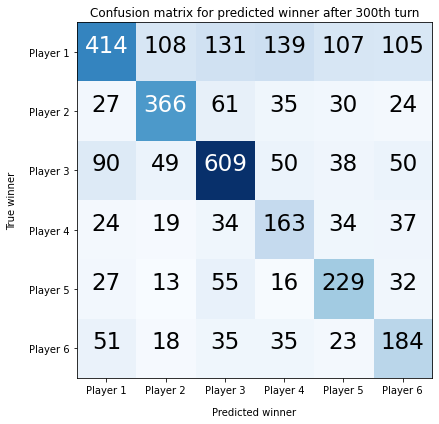

350th turn dataset:
Train on 9698 samples, validate on 2425 samples
Epoch 1/30
9698/9698 [==============================] - 1s 87us/step - loss: 16.0078 - accuracy: 0.0711 - val_loss: 15.6412 - val_accuracy: 0.0639
Epoch 2/30
9698/9698 [==============================] - 1s 61us/step - loss: 13.8793 - accuracy: 0.0803 - val_loss: 13.5291 - val_accuracy: 0.0755
Epoch 3/30
9698/9698 [==============================] - 1s 61us/step - loss: 12.0035 - accuracy: 0.0881 - val_loss: 11.6820 - val_accuracy: 0.0932
Epoch 4/30
9698/9698 [==============================] - 1s 63us/step - loss: 10.3283 - accuracy: 0.1035 - val_loss: 10.0040 - val_accuracy: 0.1196
Epoch 5/30
9698/9698 [==============================] - 1s 65us/step - loss: 8.7904 - accuracy: 0.1327 - val_loss: 8.4818 - val_accuracy: 0.1567
Epoch 6/30
9698/9698 [==============================] - 1s 62us/step - loss: 7.4320 - accuracy: 0.1759 - val_loss: 7.1643 - val_accuracy: 0.1897
Epoch 7/30
9698/9698 [==============================] 

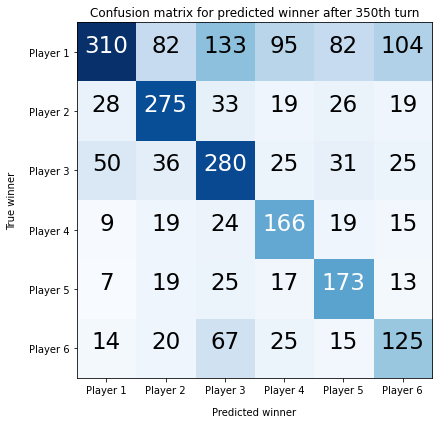

400th turn dataset:
Train on 6842 samples, validate on 1711 samples
Epoch 1/30
6842/6842 [==============================] - 1s 116us/step - loss: 20.6065 - accuracy: 0.1109 - val_loss: 19.4359 - val_accuracy: 0.1245
Epoch 2/30
6842/6842 [==============================] - 0s 49us/step - loss: 18.1624 - accuracy: 0.1155 - val_loss: 17.0682 - val_accuracy: 0.1280
Epoch 3/30
6842/6842 [==============================] - 0s 49us/step - loss: 15.9708 - accuracy: 0.1217 - val_loss: 14.9867 - val_accuracy: 0.1397
Epoch 4/30
6842/6842 [==============================] - 0s 50us/step - loss: 14.0079 - accuracy: 0.1320 - val_loss: 13.1273 - val_accuracy: 0.1514
Epoch 5/30
6842/6842 [==============================] - 0s 55us/step - loss: 12.2646 - accuracy: 0.1462 - val_loss: 11.4758 - val_accuracy: 0.1695
Epoch 6/30
6842/6842 [==============================] - 0s 63us/step - loss: 10.7332 - accuracy: 0.1657 - val_loss: 10.0396 - val_accuracy: 0.1993
Epoch 7/30
6842/6842 [===========================

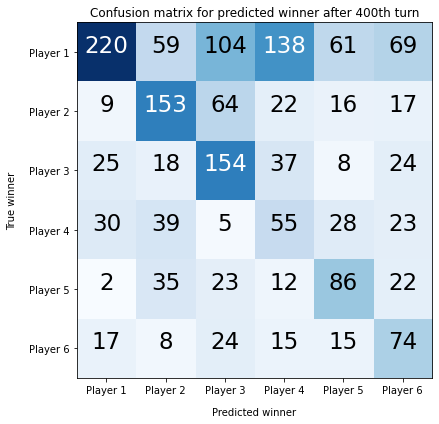

450th turn dataset:
Train on 4939 samples, validate on 1235 samples
Epoch 1/30
4939/4939 [==============================] - 1s 140us/step - loss: 9.9343 - accuracy: 0.1567 - val_loss: 9.4753 - val_accuracy: 0.1603
Epoch 2/30
4939/4939 [==============================] - 0s 64us/step - loss: 9.0165 - accuracy: 0.1753 - val_loss: 8.5926 - val_accuracy: 0.1806
Epoch 3/30
4939/4939 [==============================] - 0s 64us/step - loss: 8.2288 - accuracy: 0.1972 - val_loss: 7.8294 - val_accuracy: 0.2057
Epoch 4/30
4939/4939 [==============================] - 0s 65us/step - loss: 7.5253 - accuracy: 0.2179 - val_loss: 7.1665 - val_accuracy: 0.2300
Epoch 5/30
4939/4939 [==============================] - 0s 62us/step - loss: 6.9099 - accuracy: 0.2385 - val_loss: 6.5735 - val_accuracy: 0.2534
Epoch 6/30
4939/4939 [==============================] - 0s 61us/step - loss: 6.3429 - accuracy: 0.2588 - val_loss: 6.0386 - val_accuracy: 0.2753
Epoch 7/30
4939/4939 [==============================] - 0s 64

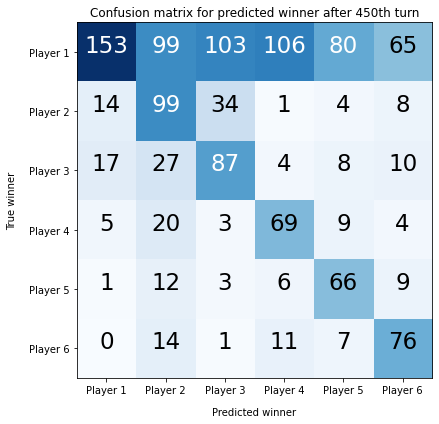

500th turn dataset:
Train on 3603 samples, validate on 901 samples
Epoch 1/30
3603/3603 [==============================] - 0s 131us/step - loss: 14.8564 - accuracy: 0.2356 - val_loss: 14.9355 - val_accuracy: 0.2253
Epoch 2/30
3603/3603 [==============================] - 0s 62us/step - loss: 14.0597 - accuracy: 0.2359 - val_loss: 14.1425 - val_accuracy: 0.2275
Epoch 3/30
3603/3603 [==============================] - 0s 74us/step - loss: 13.2933 - accuracy: 0.2384 - val_loss: 13.3922 - val_accuracy: 0.2320
Epoch 4/30
3603/3603 [==============================] - 0s 67us/step - loss: 12.5818 - accuracy: 0.2490 - val_loss: 12.6830 - val_accuracy: 0.2353
Epoch 5/30
3603/3603 [==============================] - 0s 65us/step - loss: 11.9139 - accuracy: 0.2559 - val_loss: 12.0132 - val_accuracy: 0.2475
Epoch 6/30
3603/3603 [==============================] - 0s 52us/step - loss: 11.2906 - accuracy: 0.2617 - val_loss: 11.3919 - val_accuracy: 0.2575
Epoch 7/30
3603/3603 [============================

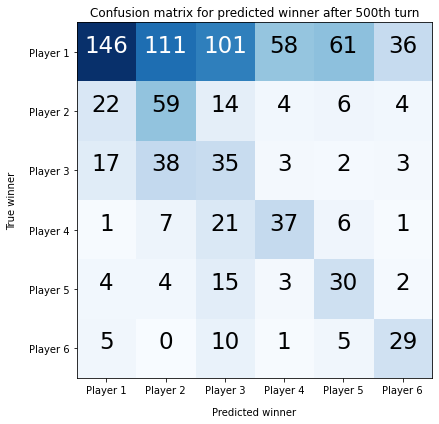

550th turn dataset:
Train on 2659 samples, validate on 665 samples
Epoch 1/30
2659/2659 [==============================] - 1s 214us/step - loss: 12.1168 - accuracy: 0.3155 - val_loss: 10.6477 - val_accuracy: 0.3323
Epoch 2/30
2659/2659 [==============================] - 0s 69us/step - loss: 11.5962 - accuracy: 0.3178 - val_loss: 10.1395 - val_accuracy: 0.3383
Epoch 3/30
2659/2659 [==============================] - 0s 75us/step - loss: 11.0992 - accuracy: 0.3227 - val_loss: 9.6479 - val_accuracy: 0.3444
Epoch 4/30
2659/2659 [==============================] - 0s 67us/step - loss: 10.6155 - accuracy: 0.3261 - val_loss: 9.1751 - val_accuracy: 0.3504
Epoch 5/30
2659/2659 [==============================] - 0s 93us/step - loss: 10.1505 - accuracy: 0.3302 - val_loss: 8.7214 - val_accuracy: 0.3564
Epoch 6/30
2659/2659 [==============================] - 0s 74us/step - loss: 9.6951 - accuracy: 0.3373 - val_loss: 8.2911 - val_accuracy: 0.3594
Epoch 7/30
2659/2659 [==============================] -

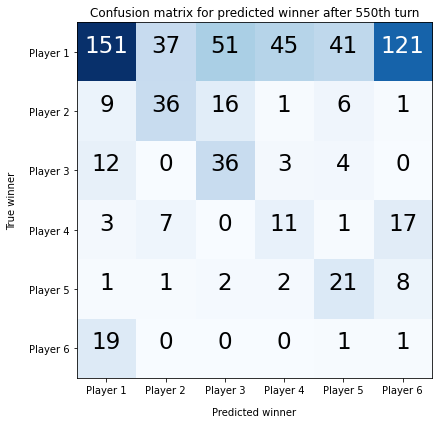

600th turn dataset:
Train on 1891 samples, validate on 473 samples
Epoch 1/30
1891/1891 [==============================] - 1s 311us/step - loss: 7.4818 - accuracy: 0.1634 - val_loss: 7.5119 - val_accuracy: 0.1755
Epoch 2/30
1891/1891 [==============================] - 0s 75us/step - loss: 7.2861 - accuracy: 0.1692 - val_loss: 7.3219 - val_accuracy: 0.1755
Epoch 3/30
1891/1891 [==============================] - 0s 70us/step - loss: 7.1011 - accuracy: 0.1724 - val_loss: 7.1418 - val_accuracy: 0.1734
Epoch 4/30
1891/1891 [==============================] - 0s 98us/step - loss: 6.9277 - accuracy: 0.1761 - val_loss: 6.9673 - val_accuracy: 0.1797
Epoch 5/30
1891/1891 [==============================] - 0s 66us/step - loss: 6.7564 - accuracy: 0.1809 - val_loss: 6.8001 - val_accuracy: 0.1797
Epoch 6/30
1891/1891 [==============================] - 0s 83us/step - loss: 6.5956 - accuracy: 0.1803 - val_loss: 6.6392 - val_accuracy: 0.1797
Epoch 7/30
1891/1891 [==============================] - 0s 70u

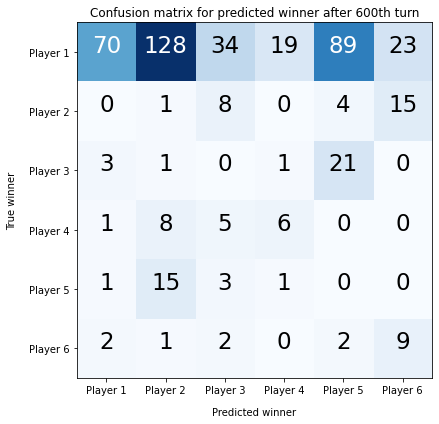

650th turn dataset:
Train on 1212 samples, validate on 304 samples
Epoch 1/30
1212/1212 [==============================] - 0s 319us/step - loss: 5.4737 - accuracy: 0.2236 - val_loss: 4.5408 - val_accuracy: 0.2401
Epoch 2/30
1212/1212 [==============================] - 0s 31us/step - loss: 5.3924 - accuracy: 0.2252 - val_loss: 4.4849 - val_accuracy: 0.2401
Epoch 3/30
1212/1212 [==============================] - 0s 39us/step - loss: 5.3148 - accuracy: 0.2252 - val_loss: 4.4304 - val_accuracy: 0.2368
Epoch 4/30
1212/1212 [==============================] - 0s 87us/step - loss: 5.2349 - accuracy: 0.2261 - val_loss: 4.3766 - val_accuracy: 0.2336
Epoch 5/30
1212/1212 [==============================] - 0s 102us/step - loss: 5.1577 - accuracy: 0.2277 - val_loss: 4.3240 - val_accuracy: 0.2336
Epoch 6/30
1212/1212 [==============================] - 0s 108us/step - loss: 5.0813 - accuracy: 0.2277 - val_loss: 4.2744 - val_accuracy: 0.2336
Epoch 7/30
1212/1212 [==============================] - 0s 7

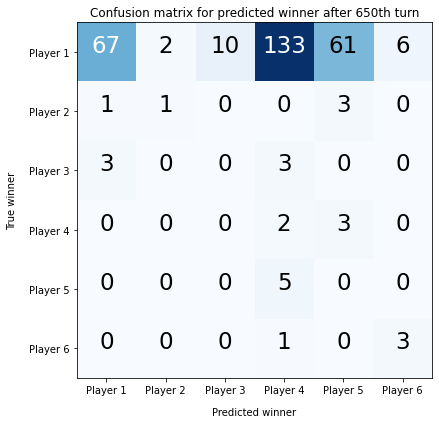

In [6]:
folder = "outlogs/nth turn datasets/"
num_players = 6
i_features = ['Player {} Africa', 'Player {} Asia', 'Player {} Australia', 'Player {} Europe', 'Player {} South America',
            'Player {} North America', 'Player {} Continental Reward', 'Player {} Country Count', 
            'Player {} Total Reinforcements', 'Player {} Troop Count', 'Player {} Troop Increase Due to Country Count',] 
features = []
for i in range(num_players):
    features = features + [feature.format(i) for feature in i_features]
targets = ["Player {} soft score".format(i) for i in range(num_players)]

def run_regression(w = 0.7):
    """ w is controls how much weight we assign to winning.
    If w is 0.7, then 1st place gets 0.7, 2nd place gets 0.7*(1-0.7) = 0.21 and so on
    """
    best_weights = []
    for nturn in range(200, 700, 50):
        if nturn == 250:
            #We don't have this data for some reason
            continue
        path = folder+"big_{}_turn.hdf".format(nturn)
        data = pd.read_hdf(path)
        data[targets] = data[targets] ** -1
        data[targets] = (1-w)**(data[targets]-1)*(w**(data[targets] < num_players-0.1))
        #data[targets] = softmax(data[targets], axis=1) #convert to probabilities
        X = data.filter(items=features)
        y = data.filter(items=targets)
        #print(X.columns.values)
        #print(y.head())
        train_index, test_index = list(ShuffleSplit(n_splits=1, test_size=0.2).split(X))[0]
        X_train, X_test, y_train, y_test =  X.iloc[train_index], X.iloc[test_index], y.iloc[train_index], y.iloc[test_index]

        #Set up model
        input_dim = len(features)
        output_dim = num_players
        lnet = Sequential()
        dense = Dense(output_dim, input_dim=input_dim, activation='softmax', kernel_regularizer=l1_l2(l1=1e-4, l2=1e-3))
        lnet.add(dense)
        opt = keras.optimizers.Adam(learning_rate=1e-4)
        lnet.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

        #train
        print(nturn,"th turn dataset:", sep='')
        lnet.fit(X_train, y_train, batch_size=64, epochs=30, verbose=1, validation_data=(X_test, y_test))
        pred_probs = lnet.predict(X_test)
        y_true = np.argmax(y_test.values, axis=1) #use argsort to get all the positions instead of just winner
        y_pred = np.argmax(pred_probs, axis=1)
        cm = confusion_matrix(y_true, y_pred)

        #plot confusion matrix 
        plot_cm(cm, num_players, "Confusion matrix for predicted winner after {}th turn".format(nturn))

        weights = dense.get_weights()
        best_weights.append(weights)
        #print(weights)
run_regression()

200th turn dataset:
Train on 25863 samples, validate on 6466 samples
Epoch 1/30
25863/25863 [==============================] - 2s 72us/step - loss: 9.2089 - accuracy: 0.1117 - val_loss: 6.3240 - val_accuracy: 0.1243
Epoch 2/30
25863/25863 [==============================] - 2s 65us/step - loss: 4.9160 - accuracy: 0.1543 - val_loss: 3.8489 - val_accuracy: 0.2066
Epoch 3/30
25863/25863 [==============================] - 2s 69us/step - loss: 3.1517 - accuracy: 0.2780 - val_loss: 2.6229 - val_accuracy: 0.3676
Epoch 4/30
25863/25863 [==============================] - 2s 74us/step - loss: 2.3264 - accuracy: 0.4202 - val_loss: 2.1181 - val_accuracy: 0.4671
Epoch 5/30
25863/25863 [==============================] - 2s 76us/step - loss: 1.9739 - accuracy: 0.4842 - val_loss: 1.8668 - val_accuracy: 0.5077
Epoch 6/30
25863/25863 [==============================] - 2s 74us/step - loss: 1.7792 - accuracy: 0.5107 - val_loss: 1.7060 - val_accuracy: 0.5311
Epoch 7/30
25863/25863 [=========================

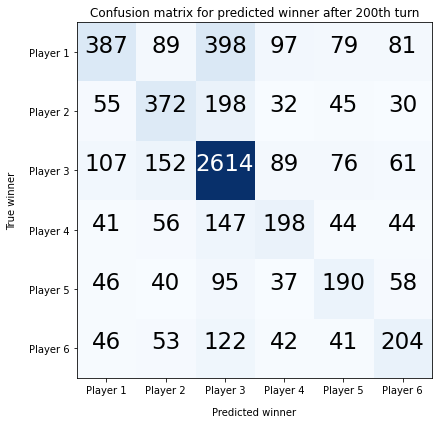

300th turn dataset:
Train on 13845 samples, validate on 3462 samples
Epoch 1/30
13845/13845 [==============================] - 1s 89us/step - loss: 14.1651 - accuracy: 0.1317 - val_loss: 11.9895 - val_accuracy: 0.1753
Epoch 2/30
13845/13845 [==============================] - 1s 79us/step - loss: 10.2062 - accuracy: 0.1800 - val_loss: 8.4563 - val_accuracy: 0.2091
Epoch 3/30
13845/13845 [==============================] - 1s 69us/step - loss: 6.9673 - accuracy: 0.2218 - val_loss: 5.6219 - val_accuracy: 0.2695
Epoch 4/30
13845/13845 [==============================] - 1s 68us/step - loss: 4.7155 - accuracy: 0.3117 - val_loss: 4.0463 - val_accuracy: 0.3752
Epoch 5/30
13845/13845 [==============================] - 1s 63us/step - loss: 3.6222 - accuracy: 0.4020 - val_loss: 3.3170 - val_accuracy: 0.4396
Epoch 6/30
13845/13845 [==============================] - 1s 69us/step - loss: 3.0458 - accuracy: 0.4519 - val_loss: 2.8699 - val_accuracy: 0.4763
Epoch 7/30
13845/13845 [======================

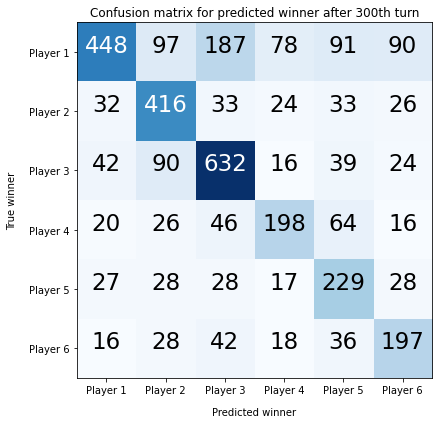

350th turn dataset:
Train on 9698 samples, validate on 2425 samples
Epoch 1/30
9698/9698 [==============================] - 1s 107us/step - loss: 17.1015 - accuracy: 0.0522 - val_loss: 16.2081 - val_accuracy: 0.0536
Epoch 2/30
9698/9698 [==============================] - 1s 71us/step - loss: 14.3776 - accuracy: 0.0557 - val_loss: 13.5857 - val_accuracy: 0.0635
Epoch 3/30
9698/9698 [==============================] - 1s 78us/step - loss: 11.9722 - accuracy: 0.0632 - val_loss: 11.3080 - val_accuracy: 0.0759
Epoch 4/30
9698/9698 [==============================] - 1s 77us/step - loss: 9.8409 - accuracy: 0.0782 - val_loss: 9.2952 - val_accuracy: 0.0990
Epoch 5/30
9698/9698 [==============================] - 1s 85us/step - loss: 7.9721 - accuracy: 0.1073 - val_loss: 7.5487 - val_accuracy: 0.1373
Epoch 6/30
9698/9698 [==============================] - 1s 81us/step - loss: 6.4056 - accuracy: 0.1582 - val_loss: 6.1078 - val_accuracy: 0.1872
Epoch 7/30
9698/9698 [==============================] -

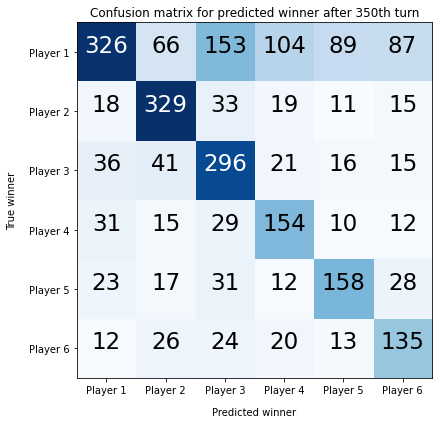

400th turn dataset:
Train on 6842 samples, validate on 1711 samples
Epoch 1/30
6842/6842 [==============================] - 1s 138us/step - loss: 18.3223 - accuracy: 0.1412 - val_loss: 17.6230 - val_accuracy: 0.1560
Epoch 2/30
6842/6842 [==============================] - 0s 73us/step - loss: 16.3229 - accuracy: 0.1500 - val_loss: 15.7138 - val_accuracy: 0.1642
Epoch 3/30
6842/6842 [==============================] - 0s 72us/step - loss: 14.5632 - accuracy: 0.1559 - val_loss: 14.0203 - val_accuracy: 0.1596
Epoch 4/30
6842/6842 [==============================] - 1s 75us/step - loss: 12.9516 - accuracy: 0.1616 - val_loss: 12.4495 - val_accuracy: 0.1654
Epoch 5/30
6842/6842 [==============================] - 1s 81us/step - loss: 11.4594 - accuracy: 0.1692 - val_loss: 10.9709 - val_accuracy: 0.1701
Epoch 6/30
6842/6842 [==============================] - 0s 61us/step - loss: 10.0606 - accuracy: 0.1735 - val_loss: 9.5949 - val_accuracy: 0.1730
Epoch 7/30
6842/6842 [============================

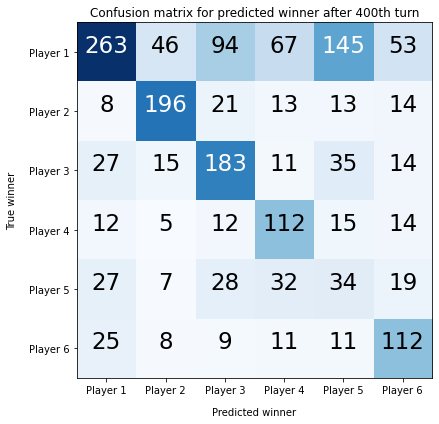

450th turn dataset:
Train on 4939 samples, validate on 1235 samples
Epoch 1/30
4939/4939 [==============================] - 1s 166us/step - loss: 13.3941 - accuracy: 0.1494 - val_loss: 13.5633 - val_accuracy: 0.1579
Epoch 2/30
4939/4939 [==============================] - 0s 89us/step - loss: 12.3796 - accuracy: 0.1490 - val_loss: 12.5432 - val_accuracy: 0.1530
Epoch 3/30
4939/4939 [==============================] - 0s 87us/step - loss: 11.4218 - accuracy: 0.1484 - val_loss: 11.5705 - val_accuracy: 0.1498
Epoch 4/30
4939/4939 [==============================] - 0s 87us/step - loss: 10.5030 - accuracy: 0.1460 - val_loss: 10.6438 - val_accuracy: 0.1538
Epoch 5/30
4939/4939 [==============================] - 0s 68us/step - loss: 9.6417 - accuracy: 0.1478 - val_loss: 9.7773 - val_accuracy: 0.1482
Epoch 6/30
4939/4939 [==============================] - 0s 96us/step - loss: 8.8305 - accuracy: 0.1506 - val_loss: 8.9668 - val_accuracy: 0.1498
Epoch 7/30
4939/4939 [==============================]

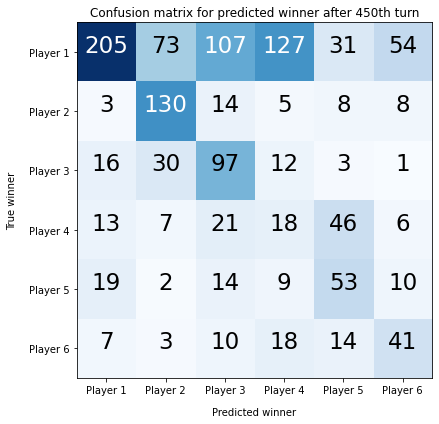

500th turn dataset:
Train on 3603 samples, validate on 901 samples
Epoch 1/30
3603/3603 [==============================] - 1s 213us/step - loss: 12.2631 - accuracy: 0.3419 - val_loss: 11.8765 - val_accuracy: 0.3651
Epoch 2/30
3603/3603 [==============================] - 0s 74us/step - loss: 11.5803 - accuracy: 0.3394 - val_loss: 11.2170 - val_accuracy: 0.3607
Epoch 3/30
3603/3603 [==============================] - 0s 71us/step - loss: 10.9383 - accuracy: 0.3394 - val_loss: 10.5982 - val_accuracy: 0.3596
Epoch 4/30
3603/3603 [==============================] - 0s 69us/step - loss: 10.3341 - accuracy: 0.3447 - val_loss: 10.0205 - val_accuracy: 0.3718
Epoch 5/30
3603/3603 [==============================] - 0s 69us/step - loss: 9.7722 - accuracy: 0.3522 - val_loss: 9.4863 - val_accuracy: 0.3696
Epoch 6/30
3603/3603 [==============================] - 0s 74us/step - loss: 9.2590 - accuracy: 0.3608 - val_loss: 9.0048 - val_accuracy: 0.3785
Epoch 7/30
3603/3603 [==============================] 

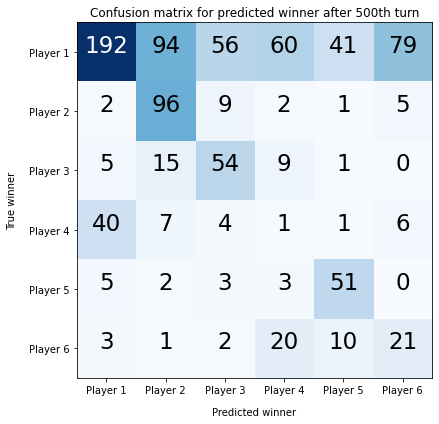

550th turn dataset:
Train on 2659 samples, validate on 665 samples
Epoch 1/30
2659/2659 [==============================] - 1s 198us/step - loss: 7.1323 - accuracy: 0.0669 - val_loss: 5.9222 - val_accuracy: 0.0692
Epoch 2/30
2659/2659 [==============================] - 0s 67us/step - loss: 6.7891 - accuracy: 0.0684 - val_loss: 5.6290 - val_accuracy: 0.0707
Epoch 3/30
2659/2659 [==============================] - 0s 74us/step - loss: 6.4464 - accuracy: 0.0707 - val_loss: 5.3432 - val_accuracy: 0.0737
Epoch 4/30
2659/2659 [==============================] - 0s 70us/step - loss: 6.1195 - accuracy: 0.0737 - val_loss: 5.0637 - val_accuracy: 0.0752
Epoch 5/30
2659/2659 [==============================] - 0s 123us/step - loss: 5.7971 - accuracy: 0.0763 - val_loss: 4.7980 - val_accuracy: 0.0782
Epoch 6/30
2659/2659 [==============================] - 0s 78us/step - loss: 5.4892 - accuracy: 0.0809 - val_loss: 4.5340 - val_accuracy: 0.0872
Epoch 7/30
2659/2659 [==============================] - 0s 66

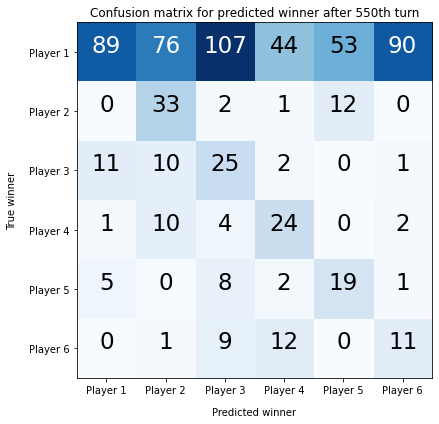

600th turn dataset:
Train on 1891 samples, validate on 473 samples
Epoch 1/30
1891/1891 [==============================] - 1s 327us/step - loss: 6.4094 - accuracy: 0.0677 - val_loss: 5.8868 - val_accuracy: 0.0655
Epoch 2/30
1891/1891 [==============================] - 0s 71us/step - loss: 6.2398 - accuracy: 0.0714 - val_loss: 5.7311 - val_accuracy: 0.0677
Epoch 3/30
1891/1891 [==============================] - 0s 72us/step - loss: 6.0728 - accuracy: 0.0762 - val_loss: 5.5767 - val_accuracy: 0.0698
Epoch 4/30
1891/1891 [==============================] - 0s 76us/step - loss: 5.9109 - accuracy: 0.0783 - val_loss: 5.4262 - val_accuracy: 0.0782
Epoch 5/30
1891/1891 [==============================] - 0s 57us/step - loss: 5.7529 - accuracy: 0.0793 - val_loss: 5.2787 - val_accuracy: 0.0803
Epoch 6/30
1891/1891 [==============================] - 0s 91us/step - loss: 5.6013 - accuracy: 0.0825 - val_loss: 5.1336 - val_accuracy: 0.0825
Epoch 7/30
1891/1891 [==============================] - 0s 93u

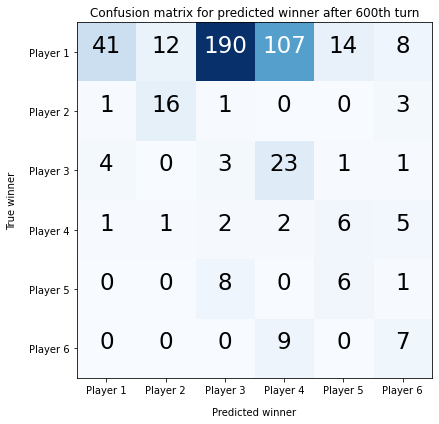

650th turn dataset:
Train on 1212 samples, validate on 304 samples
Epoch 1/30
1212/1212 [==============================] - 0s 402us/step - loss: 4.9988 - accuracy: 0.5107 - val_loss: 3.2702 - val_accuracy: 0.4934
Epoch 2/30
1212/1212 [==============================] - 0s 47us/step - loss: 4.9513 - accuracy: 0.5099 - val_loss: 3.2398 - val_accuracy: 0.4934
Epoch 3/30
1212/1212 [==============================] - 0s 104us/step - loss: 4.9040 - accuracy: 0.5083 - val_loss: 3.2096 - val_accuracy: 0.4934
Epoch 4/30
1212/1212 [==============================] - 0s 80us/step - loss: 4.8574 - accuracy: 0.5083 - val_loss: 3.1798 - val_accuracy: 0.4934
Epoch 5/30
1212/1212 [==============================] - 0s 83us/step - loss: 4.8111 - accuracy: 0.5066 - val_loss: 3.1501 - val_accuracy: 0.4934
Epoch 6/30
1212/1212 [==============================] - 0s 75us/step - loss: 4.7670 - accuracy: 0.5058 - val_loss: 3.1205 - val_accuracy: 0.4934
Epoch 7/30
1212/1212 [==============================] - 0s 80

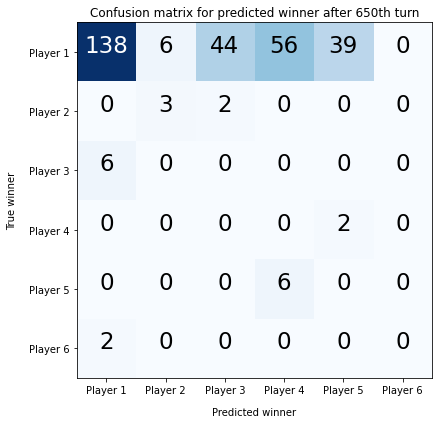

In [7]:
run_regression(w=0.9)